<a href="https://colab.research.google.com/github/Vinisenso/Electric_Potential/blob/main/LE404_Projeto_Num%C3%A9rico_02_F%C3%ADsica_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LE404A - Física Geral III

***Trabalho Numérico 02:*** *Cálculo do Potencial Elétrico de um Condutor Carregado* 

Responsável: Marcelo Zoéga Maialle

Data: 29/10/2021

Integrantes do Grupo:
*   Augusto Chebel Machado            RA: 231762
*   Leonardo de Lima Paiva            RA: 220057
*   Lucas Tramonte                    RA: 182697
*   Vinícius Consentino Muniz         RA: 245271


In [ ]:
# importando as bibliotecas que serão utilizadas:
import numpy as np              
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib import cm

# Dados parametrizados:
Vesq = 10               # Potencial inicial a esquerda (V esquerda)
Vres = 0                # Potencial nas demais arestas (V resto)
medRA = str((231762 + 220057 + 182697 + 245271) / 4)

M1 = int(medRA[5])
M2 = int(medRA[4])
print(f'Média = {medRA}\nM1 = {M1}\nM2 = {M2}')

Média = 219946.75
M1 = 6
M2 = 4


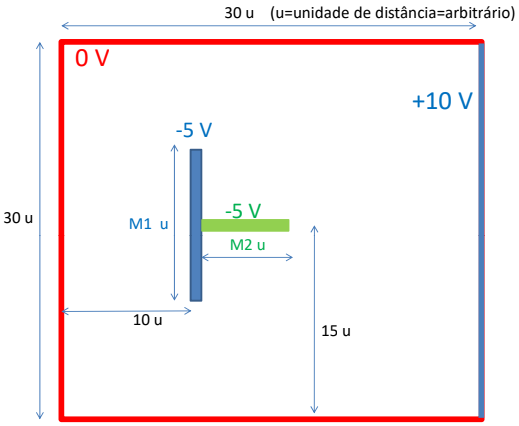

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
6,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
7,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
8,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0


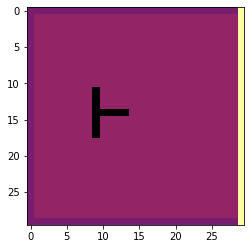

In [ ]:
# criando a grade de pontos:
m = 30
x = np.arange(0, m, 1)   # coordenadas x e y, de 0 a 30 u
y = np.arange(0, m, 1) 
X,Y = np.meshgrid(x, y)

# atribuindo valores de potencial V arbritários:
Vval = np.zeros((m, m))   # criação de uma matriz para acomodar cada valor de campo no ponto (x,y) qualquer

# laços percorrendo cada par ordenado, atribuindo condições de contorno para as arestas exteriores:
for i in range(0, m):  
  for j in range(0, m):
    Vval[i][j] = 1       # abastecimento de todos os pontos internos com 1 V
    if j == (m-1):
      Vval[i][j] = Vesq  # última coluna ser 10
    elif i == 0:
      Vval[i][j] = 0     # linha 1 ser 0
    elif j == 0:
      Vval[i][j] = 0     # primeira coluna ser 0
    elif i == (m-1):
      Vval[i][j] = 0     # última linha ser 0
    
# condições de contorno interiores:
for i in range(10,14): # condições de contorno internas na vertical 
  Vval[14][i] = -5
    
for i in range(11,18): # condições de contorno internas na horizontal
  Vval[i][9] = -5

# visualizando as condições iniciais: 
df = pd.DataFrame(Vval)
plt.imshow(df, cmap='inferno')

pd.set_option('display.precision', 1)
df.style.set_properties(**{'background-color': 'lightgrey',
                           'color': 'black',
                           'border-color': 'darkgrey',
                           'border-width': '1px',
                           'border-style': 'solid'})
df.style.background_gradient(cmap='inferno')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


Foram necessárias 48608 iterações para alcançar a precisão determinada



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.0,0.0,0.1,0.1,0.2,0.3,0.3,0.5,0.6,0.8,1.0,1.4,1.9,2.9,5.0,10.0
2,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,-0.0,0.0,0.1,0.2,0.3,0.5,0.7,0.9,1.2,1.5,2.0,2.6,3.5,4.8,6.9,10.0
3,0.0,-0.0,-0.1,-0.1,-0.2,-0.2,-0.3,-0.3,-0.3,-0.4,-0.3,-0.3,-0.3,-0.2,-0.1,0.0,0.1,0.3,0.5,0.7,1.0,1.3,1.7,2.2,2.8,3.5,4.6,5.9,7.8,10.0
4,0.0,-0.1,-0.1,-0.2,-0.3,-0.4,-0.4,-0.5,-0.5,-0.5,-0.5,-0.5,-0.4,-0.3,-0.2,-0.0,0.2,0.4,0.6,0.9,1.2,1.6,2.1,2.7,3.4,4.3,5.3,6.6,8.2,10.0
5,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.7,-0.8,-0.7,-0.7,-0.6,-0.5,-0.3,-0.1,0.1,0.4,0.7,1.0,1.4,1.9,2.5,3.1,3.9,4.8,5.8,7.1,8.5,10.0
6,0.0,-0.1,-0.3,-0.4,-0.5,-0.7,-0.8,-0.9,-1.0,-1.0,-1.0,-0.9,-0.8,-0.7,-0.5,-0.2,0.1,0.4,0.7,1.1,1.6,2.1,2.7,3.4,4.2,5.2,6.2,7.4,8.7,10.0
7,0.0,-0.2,-0.3,-0.5,-0.7,-0.9,-1.1,-1.2,-1.3,-1.4,-1.4,-1.3,-1.1,-0.9,-0.7,-0.4,-0.0,0.3,0.8,1.2,1.7,2.3,2.9,3.7,4.5,5.4,6.5,7.6,8.8,10.0
8,0.0,-0.2,-0.4,-0.6,-0.9,-1.1,-1.3,-1.6,-1.8,-1.9,-1.8,-1.7,-1.5,-1.2,-0.9,-0.5,-0.2,0.3,0.7,1.2,1.8,2.4,3.1,3.9,4.7,5.6,6.6,7.7,8.8,10.0
9,0.0,-0.2,-0.5,-0.7,-1.0,-1.3,-1.7,-2.0,-2.3,-2.5,-2.4,-2.2,-1.9,-1.6,-1.2,-0.8,-0.3,0.2,0.7,1.2,1.8,2.5,3.2,4.0,4.8,5.8,6.8,7.8,8.9,10.0


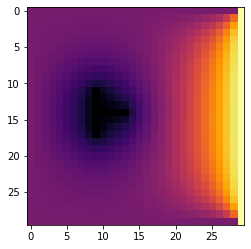

In [ ]:
# definindo a precisão do processo
preci = 0.0001      # definição da precisão
delta = 1           # definição da validação

# método iterativo - relaxação:
Vnovo = 0 # variável para acomodar os valores novos de campo a cada iteração
validacao = 0
iter = 0

while delta > preci:           # enquanto não se atinge-se a precisão definida
  for i in range(1, m-1):      # iteração feita para os pontos internos - bordas permancem inalteradas
    for j in range(1, m-1):

      if Vval[i][j] != -5:     # condição para não mudar os potenciais fixos no meio
        Vnovo = (Vval[i+1][j] + Vval[i-1][j] + Vval[i][j+1] + Vval[i][j-1])/4 # novos valores de potencial pela média dos 4 pontos vizinhos
        validacao=abs((Vnovo - Vval[i][j]) / Vnovo)                           # módulo da validação fracionária
      
        if validacao > 0:     
          delta = validacao
        if delta > preci:
          Vval[i][j] = round(Vnovo, 3)  # atualização do valor de potencial no ponto até a precisão ser atingida
      iter = iter + 1
      
df = pd.DataFrame(Vval) # visualização dos valores de potencial obtidos
print(f'Foram necessárias {iter} iterações para alcançar a precisão determinada\n')

plt.imshow(df, cmap='inferno')

pd.set_option('display.precision', 1)
df.style.set_properties(**{'background-color': 'lightgrey',
                           'color': 'black',
                           'border-color': 'darkgrey',
                           'border-width': '1px',
                           'border-style': 'solid'})
df.style.background_gradient(cmap='inferno')

In [ ]:
# Calculando o campo
Ex = np.zeros((m,m))  # matrizes que vão comportar os valores de campo
Ey = np.zeros((m,m))
Emod = np.zeros((m,m))

dirEx = []
dirEy = []
coord_x = []
coord_y = []
for i in range(1,m-1):    # iteração para os pontos internos, conforme orientação do livro
  for j in range(1,m-1):
    Ex[i][j]= round(-(Vval[i+1][j]-Vval[i-1][j])/2,3) # cálculo do campo conforme o livro orienta
    dirEx.append(Ex[i][j])
    coord_x.append(i)   
    
    Ey[i][j]= round(-(Vval[i][j+1]-Vval[i][j-1])/2,3)
    dirEy.append(Ey[i][j])
    coord_y.append(j)

    Emod[i][j]=round(((Ex[i][j])**2 + (Ey[i][j])**2 )**(1/2),3)  # cálculo do módulo (intensidade)

# grade de valores Ex:
df_Ex = pd.DataFrame(Ex) 
pd.set_option('display.precision', 1)
df_Ex.style.set_properties(**{'background-color': 'lightgrey',
                              'color': 'black',
                              'border-color': 'darkgrey',
                              'border-width': '1px',
                              'border-style': 'solid'})


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.2,-0.2,-0.3,-0.4,-0.6,-0.8,-1.0,-1.3,-1.7,-2.4,-3.4,0.0
2,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,-0.0,-0.1,-0.2,-0.2,-0.3,-0.4,-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.4,0.0
3,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-0.9,-0.7,0.0
4,0.0,0.0,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.0,-0.0,-0.1,-0.2,-0.2,-0.3,-0.4,-0.5,-0.6,-0.6,-0.6,-0.6,-0.4,0.0
5,0.0,0.0,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.2,0.2,0.2,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.2,-0.2,-0.3,-0.4,-0.4,-0.5,-0.4,-0.4,-0.2,0.0
6,0.0,0.0,0.1,0.1,0.1,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.2,-0.2,-0.3,-0.3,-0.3,-0.3,-0.2,-0.1,0.0
7,0.0,0.0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.4,0.4,0.3,0.3,0.2,0.2,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,0.0
8,0.0,0.0,0.1,0.1,0.2,0.2,0.3,0.4,0.5,0.5,0.5,0.5,0.4,0.3,0.3,0.2,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.1,-0.1,-0.1,0.0
9,0.0,0.0,0.1,0.1,0.2,0.2,0.3,0.4,0.6,0.8,0.7,0.5,0.5,0.4,0.3,0.2,0.2,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,0.0


In [ ]:
# grade de valores Ey:
df_Ey = pd.DataFrame(Ey)
pd.set_option('display.precision', 1)
df_Ey.style.set_properties(**{'background-color': 'lightgrey',
                              'color': 'black',
                              'border-color': 'darkgrey',
                              'border-width': '1px',
                              'border-style': 'solid'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.3,-0.5,-0.8,-1.5,-3.5,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.3,-0.4,-0.5,-0.8,-1.1,-1.7,-2.6,0.0
3,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.3,-0.4,-0.4,-0.5,-0.7,-0.9,-1.2,-1.6,-2.0,0.0
4,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.3,-0.3,-0.4,-0.4,-0.5,-0.6,-0.8,-1.0,-1.2,-1.4,-1.7,0.0
5,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.3,-0.3,-0.4,-0.4,-0.5,-0.6,-0.7,-0.8,-1.0,-1.2,-1.3,-1.5,0.0
6,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,-0.0,-0.1,-0.1,-0.2,-0.2,-0.3,-0.3,-0.3,-0.4,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,0.0
7,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.0,-0.1,-0.1,-0.2,-0.2,-0.3,-0.3,-0.3,-0.4,-0.4,-0.5,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.2,0.0
8,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.0,-0.1,-0.2,-0.2,-0.3,-0.3,-0.4,-0.4,-0.4,-0.5,-0.5,-0.6,-0.7,-0.7,-0.8,-0.9,-1.0,-1.0,-1.1,-1.1,0.0
9,0.0,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.1,-0.1,-0.3,-0.3,-0.4,-0.4,-0.4,-0.5,-0.5,-0.5,-0.6,-0.6,-0.7,-0.7,-0.8,-0.9,-1.0,-1.0,-1.1,-1.1,0.0


In [ ]:
# grade de valores Emod:
df_Emod = pd.DataFrame(Emod)
pd.set_option('display.precision', 1)
df_Emod.style.set_properties(**{'background-color': 'lightgrey',
                              'color': 'black',
                              'border-color': 'darkgrey',
                              'border-width': '1px',
                              'border-style': 'solid'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0,1.4,1.9,2.8,4.9,0.0
2,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0,1.3,1.7,2.3,3.0,0.0
3,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.4,0.5,0.6,0.8,1.0,1.2,1.5,1.8,2.1,0.0
4,0.0,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.4,0.4,0.5,0.7,0.8,1.0,1.1,1.4,1.6,1.7,0.0
5,0.0,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.4,1.5,0.0
6,0.0,0.1,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.3,1.3,0.0
7,0.0,0.2,0.2,0.2,0.2,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.6,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.2,0.0
8,0.0,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.6,0.7,0.7,0.8,0.9,1.0,1.1,1.1,1.1,0.0
9,0.0,0.2,0.3,0.3,0.3,0.4,0.5,0.6,0.7,0.8,0.7,0.6,0.6,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.7,0.8,0.8,0.9,1.0,1.0,1.1,1.1,0.0


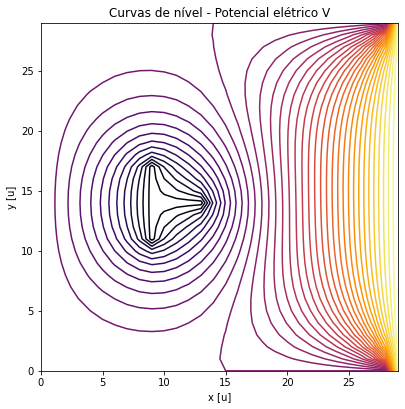

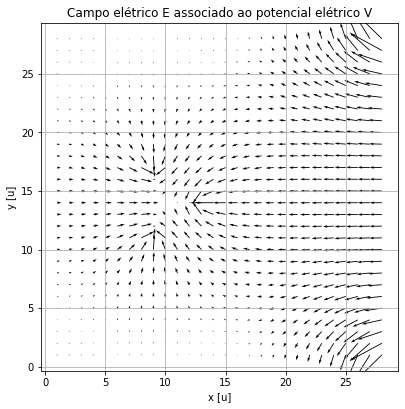

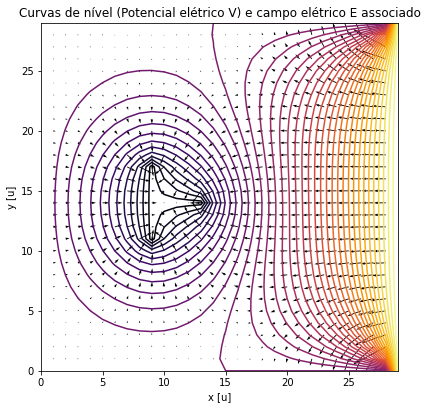

In [ ]:
# plotando as curvas de nível:

plt.figure(1, figsize=[6.4,6.4])
plt.contour(x, y, Vval, 40,cmap="inferno")
plt.title('Curvas de nível - Potencial elétrico V')
plt.xlabel('x [u]')
plt.ylabel('y [u]')

plt.figure(2, figsize=[6.4,6.4])
plt.quiver(coord_y, coord_x, dirEy, dirEx, scale=30)
plt.title('Campo elétrico E associado ao potencial elétrico V')
plt.xlabel('x [u]')
plt.ylabel('y [u]')
plt.grid()

# plotando as curvas de nível e campo elétrico gradiente
plt.figure(3, figsize=[6.4,6.4])
plt.contour(x, y, Vval, 40, cmap="inferno")
plt.quiver(coord_y, coord_x, dirEy, dirEx, scale=30)
plt.title('Curvas de nível (Potencial elétrico V) e campo elétrico E associado')
plt.xlabel('x [u]')
plt.ylabel('y [u]')

plt.show()

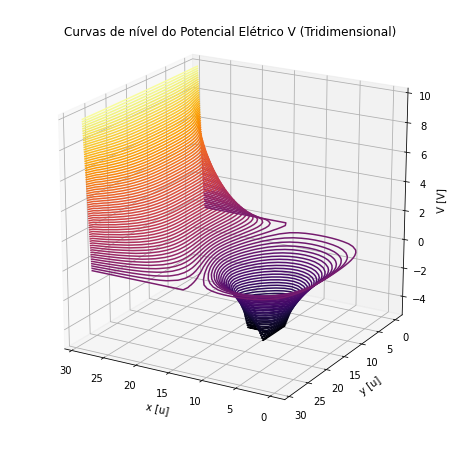

In [ ]:
# plotando as curvas de nível (3D):

plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')
ax.contour3D(x, y, Vval, 100, cmap='inferno')
ax.set_xlabel('x [u]')
ax.set_ylabel('y [u]')
ax.set_zlabel('V [V]')
plt.title("Curvas de nível do Potencial Elétrico V (Tridimensional)")
ax.view_init(20, 120) # ângulo de visão

plt.show()

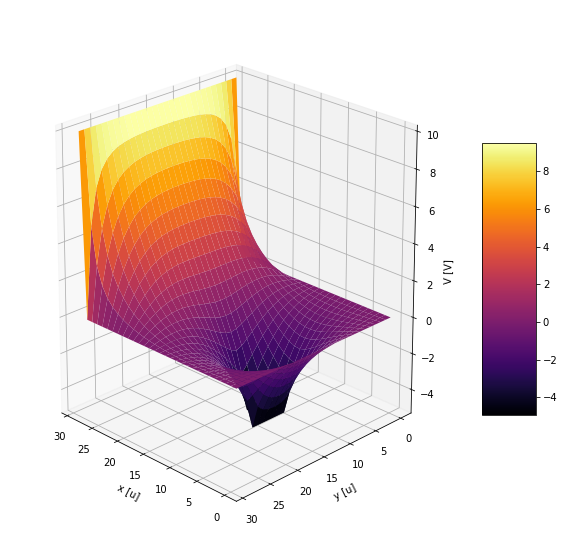

In [ ]:
# Plotando a superfície do Potencial Elétrico V

fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.set_xlabel('x [u]')
ax.set_ylabel('y [u]')
ax.set_zlabel('V [V]')

super = ax.plot_surface(X, Y, Vval, cmap= 'inferno')
fig.colorbar(super,shrink=0.5,aspect=5)
ax.view_init(20, 135)

plt.show()

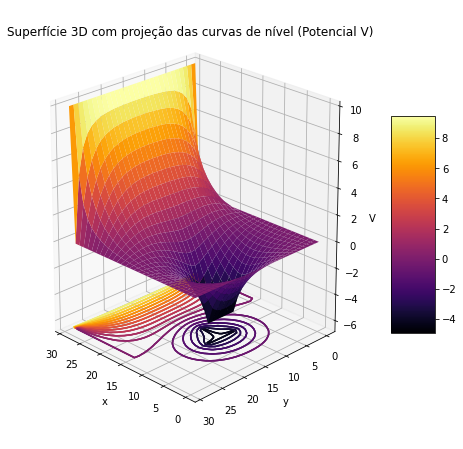

In [ ]:
# plotando a superfície do potencial + projeção em curvas de nível

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

super = ax.plot_surface(X, Y, Vval,cmap='inferno')
cset = ax.contour(x, y, Vval, 20, offset=-6.5, cmap='inferno')
cset = ax.contour(x, y, Vval, 20, offset=-6.5, cmap='inferno')
cset = ax.contour(x, y, Vval, 20, offset=-6.5, cmap='inferno')

fig.colorbar(super, ax=ax, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.set_zlim(-6.5)
ax.set_title('Superfície 3D com projeção das curvas de nível (Potencial V)')

ax.view_init(20, 135)
plt.show()

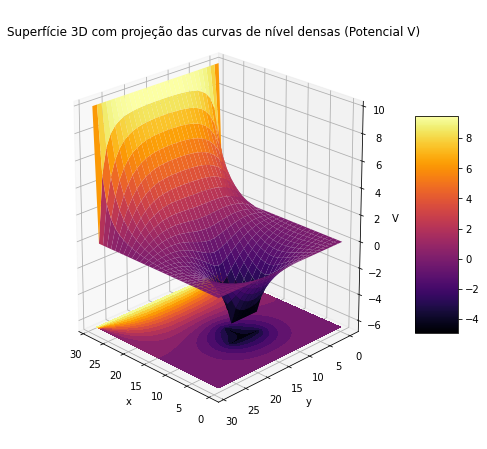

In [ ]:
# plotando a superfície do potencial + projeção densa

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

super = ax.plot_surface(X, Y, Vval,cmap='inferno')
cset = ax.contourf(x, y, Vval, 20, offset=-6.5, cmap='inferno')
cset = ax.contourf(x, y, Vval, 20, offset=-6.5, cmap='inferno')
cset = ax.contourf(x, y, Vval, 20, offset=-6.5, cmap='inferno')

fig.colorbar(super, ax=ax, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.set_zlim(-6.5)
ax.set_title('Superfície 3D com projeção das curvas de nível densas (Potencial V)')

ax.view_init(20, 135)
plt.show()

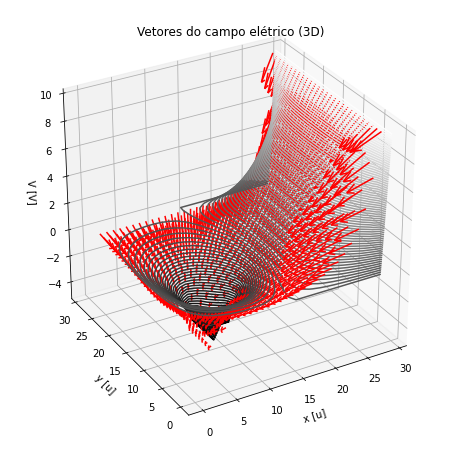

In [ ]:
# campo vetorial em 3D

fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')

ax = plt.axes(projection='3d')
ax.contour3D(x, y, Vval, 100,cmap="gray")
ax.set_xlabel('x [u]')
ax.set_ylabel('y [u]')
ax.set_zlabel('V [V]')
ax.set_title('Vetores do campo elétrico (3D)')

for i in range(1,m-1):    # iteração para os pontos internos, conforme orientação do livro
  for j in range(1,m-1):
    ax.quiver(j,i,Vval[i+1][j+1],-(j+1),-(i+1),-Vval[i][j], length=0.15, color = 'red')
ax.view_init(30, 240)
plt.show()

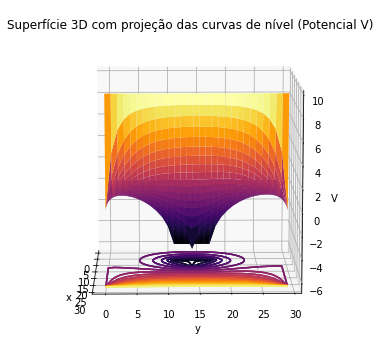

In [ ]:
# Animação
from matplotlib import animation
from IPython.display import HTML
from base64 import b64encode

fig = plt.figure(figsize=(6.4,6.4))
ax = fig.add_subplot(projection='3d')

super = ax.plot_surface(X, Y, Vval,cmap='inferno')
cset = ax.contour(x, y, Vval, 20, offset=-6.5, cmap='inferno')
cset = ax.contour(x, y, Vval, 20, offset=-6.5, cmap='inferno')
cset = ax.contour(x, y, Vval, 20, offset=-6.5, cmap='inferno')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.set_zlim(-6.5)
ax.set_title('Superfície 3D com projeção das curvas de nível (Potencial V)')

ax.view_init(20, 135)

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate,
                               frames=360, interval=20, blit=True)

# Save
anim.save('Superficie_Potencial_V.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

mp4 = open('Superficie_Potencial_V.mp4','rb').read()
data_url = "data:Superficie_Potencial_V/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
# baixar a animação:
from google.colab import files

files.download('Superficie_Potencial_V.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>